C:\Users\KARTHIK\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

#VALUE!        178
0.858250869    156
0.856073017     74
0.866673265     62
0.949268378     53
0.855997898     52
0.907493781     48
0.910790806     46
0.854256698     43
0.957236562     42
0.783266129     40
0.9461965       37
0.945726357     36
0.922618485     34
0.924153617     34
0.852994391     33
0.970746415     32
0.945345927     31
0.858803987     29
0.9478819       28
0.893901919     28
0.902826318     28
0.920478702     27
0.928585961     27
0.936503444     26
0.94583974      26
0.943994181     26
0.807624781     26
0.826276917     26
0.738042577     26
              ... 
0.786155914      1
0.793328391      1
0.872853585      1
0.760667308      1
0.837665079      1
0.832109017      1
0.721016788      1
0.827726533      1
0.836980124      1
0.887882321      1
0.909317887      1
0.83546236       1
0.807992507      1
0.919809718      1
0.854446764      1
0.844222961      1
0.923533352      1
0.882918817      1
0.907096954      1
0.871143174      1
0.919759062      1
0.868813273 

C:\Users\KARTHIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Before scaling
-------------
Variable #0: min 1231113600.0, max 1293667200.0, mean 1262200161.09 and std dev 17985752.59
Variable #1: min 0.0, max 2.0, mean 0.93 and std dev 0.68
Variable #2: min 2001.0, max 2010.0, mean 2005.36 and std dev 1.73
Variable #3: min 0.0, max 29.0, mean 9.43 and std dev 7.15
Variable #4: min 0.0, max 15.0, mean 8.02 and std dev 5.16
After scaling
-------------
Variable #0: min -1.7283992384002063, max 1.7495536397346771, mean -0.00 and std dev 1.00
Variable #1: min -1.3704181601701906, max 1.5830280369289549, mean -0.00 and std dev 1.00
Variable #2: min -2.518742069603549, max 2.683902546337805, mean -0.00 and std dev 1.00
Variable #3: min -1.3180941255281287, max 2.735565765356574, mean 0.00 and std dev 1.00
Variable #4: min -1.553785127978152, max 1.353840974989974, mean -0.00 and std dev 1.00
Train accuracy: 0.8707333034822443
Test accuracy: 0.8705296150446034
             precision    recall  f1-score   support

          0       0.87      1.00      0.9

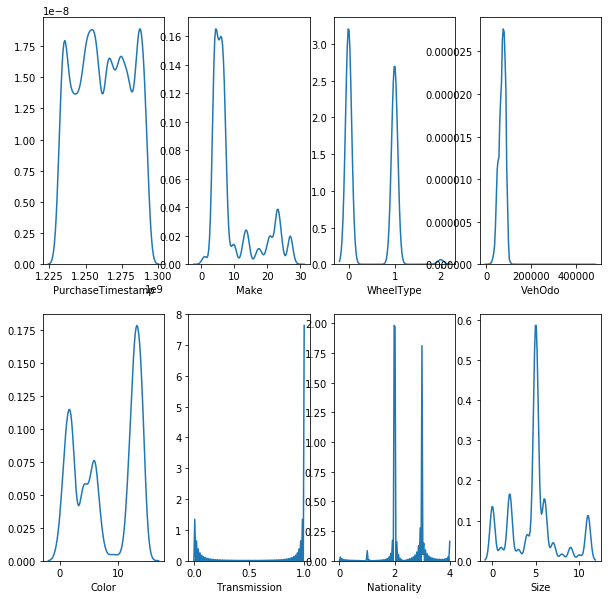

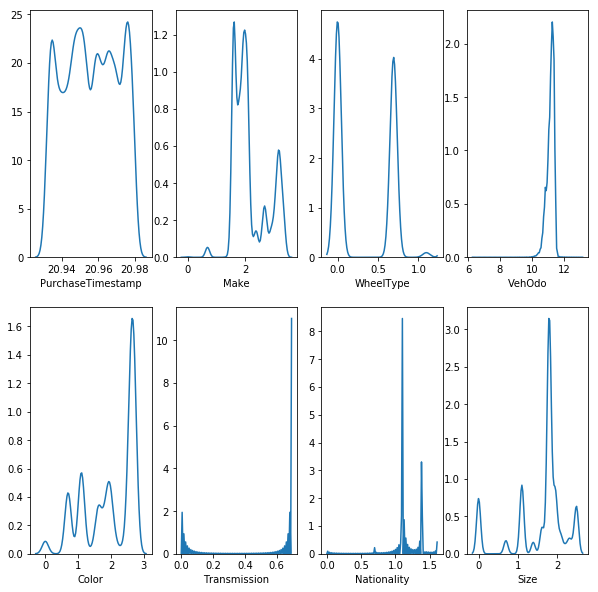

C:\Users\KARTHIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:263: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train accuracy: 0.8707677470464643
Test accuracy: 0.8705296150446034
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10832
          1       0.50      0.00      0.00      1611

avg / total       0.82      0.87      0.81     12443

Original feature set 19
Number of features after elimination 19
Train accuracy: 0.8707333034822443
Test accuracy: 0.8705296150446034
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10832
          1       0.50      0.00      0.00      1611

avg / total       0.82      0.87      0.81     12443

{'C': 1}
Original feature set 19
Number of features after elimination 10
Train accuracy: 0.8708710777391244
Test accuracy: 0.8704492485734951
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10832
          1       0.33      0.00      0.00      1611

avg / total       0.80      0.87      0.81     12443

{'C': 0.1}


In [20]:
import pandas as pd
import numpy as np
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

#reading csv file
df=pd.read_csv('CaseStudyData.csv')
print(df.info())
df=df.drop(['PRIMEUNIT','AUCGUART'],axis=1)
df=df.drop(['PurchaseDate','WheelTypeID','PurchaseID'],axis=1)
df=df.drop(['MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice'],axis=1)
df=df.drop(['MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice'],axis=1)
print(df.info())

#df['Auction'].replace('',np.nan,inplace=True)
#df.dropna(subset=['Auction'],inplace=True)

#Pre-processing
print(df['Auction'].value_counts())
Auction_map={'ADESA':0,'MANHEIM':1,'OTHER':2}
df['Auction']=df['Auction'].map(Auction_map)
df['Auction'].fillna(0,inplace=True)
df['Auction'] = df['Auction'].astype(int)

print(df['PurchaseTimestamp'].value_counts())


print(df['WheelType'].value_counts())
WheelType_map={'Alloy':0,'Covers':1,'Special':2,'?':0}
df['WheelType']=df['WheelType'].map(WheelType_map)
df['WheelType'].fillna(0,inplace=True)
df['WheelType'] = df['WheelType'].astype(float)

print(df['Make'].value_counts())
Make_map={'ACURA':0,'BUICK':1,'CADILLAC':3,'CHEVROLET':4,'CHRYSLER':5,'DODGE':6,'FORD':7,'GMC':8,'HONDA':9,'HYUNDAI':10,'INFINITII':11,'ISUZU':12,'JEEP':13,'KIA':14,'LEXUS':15,'LINCOLN':16,'MAZDA':17,'MERCURY':18,'MINI':19,'MITSUBISHI':20,'NISSAN':21,'OLDSMOBILE':22,'PONTIAC':23,'SATURN':24,'SCION':25,'SUBARU':26,'SUZUKI':27,'TOYOTA':27,'VOLKSWAGEN':28,'VOLVO':29,'?':4}
df['Make']=df['Make'].map(Make_map)
df['Make'].fillna(4,inplace=True)
df['Make'] = df['Make'].astype(float)

print(df['Color'].value_counts())
Color_map={'BEIGE':0,'BLACK':1,'BLUE':2,'BROWN':3,'GOLD':4,'GREEN':5,'GREY':6,'MAROON':7,'NOT AVAIL':8,'ORANGE':9,'OTHER':10,'PURPLE':11,'RED':12,'SILVER':13,'WHITE':14,'YELLOW':15,'?':13}
df['Color']=df['Color'].map(Color_map)
df['Color'].fillna(13,inplace=True)
df['Color'] = df['Color'].astype(int)

print(df['Transmission'].value_counts())
Transmission_map={'AUTO':0,'MANUAL':1,'?':0,'Manual':1}
df['Transmission']=df['Transmission'].map(Transmission_map)
df['Transmission'].fillna(0,inplace=True)
df['Transmission'] = df['Transmission'].astype(int)

print(df['VehOdo'].value_counts())
vehodo_map={'?':df['VehOdo'].mean()}
df['VehOdo'].fillna(df['VehOdo'].mean(),inplace=True)
df['VehOdo'] = df['VehOdo'].astype(int)

print(df['Nationality'].value_counts())
Nationality_map={'AMERICAN':0,'OTHER':1,'OTHER ASIAN':2,'TOP LINE ASIAN':3,'USA':4,'?':0}
df['Nationality']=df['Nationality'].map(Nationality_map)
df['Nationality'].fillna(0,inplace=True)
df['Nationality'] = df['Nationality'].astype(int)

print(df['Size'].value_counts())
Size_map={'COMPACT':0,'CROSSOVER':1,'LARGE':2,'LARGE SUV':3,'LARGE TRUCK':4,'MEDIUM':5,'MEDIUM SUV':6,'SMALL SUV':7,'SMALL TRUCK':8,'SPECIALTY':9,'SPORTS':10,'VAN':11,'?':5}    
df['Size']=df['Size'].map(Size_map)
df['Size'].fillna(5,inplace=True)
df['Size'] = df['Size'].astype(int)

print(df['VehYear'].value_counts())
df['VehYear'].fillna(2006.0,inplace=True)
df['VehYear'] = df['VehYear'].astype(int)

print(df['TopThreeAmericanName'].value_counts())
american_name_map={'CHRYSLER':0,'FORD':1,'GM':2,'OTHER':3,'?':2}
df['TopThreeAmericanName']=df['TopThreeAmericanName'].map(american_name_map)
df['TopThreeAmericanName'].fillna(2,inplace=True)
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].astype(int)

print(df['MMRAcquisitionAuctionAveragePrice'].value_counts())
df['MMRAcquisitionAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice'].replace('?',np.NaN)
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(float)

print(df['MMRCurrentAuctionAveragePrice'].value_counts())
df['MMRCurrentAuctionAveragePrice']=df['MMRCurrentAuctionAveragePrice'].replace('?',np.NaN)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(float)

print(df['MMRCurrentRetailRatio'].value_counts())
df['MMRCurrentRetailRatio']=df['MMRCurrentRetailRatio'].replace(['?','#VALUE!'],np.NaN)
df['MMRCurrentRetailRatio'].fillna(df['MMRCurrentRetailRatio'].median(skipna=True),inplace=True)
df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailRatio'].astype(float)

print(df['VNST'].value_counts())
vnst_map = {'TX':0, 'FL':1,'CO':2,'NC':3,'AZ':4,'CA':5,'OK':6,'SC':7,'TN':8,'GA':9,'VA':10,'MO':11,'PA':12,'NV':13,'IN':14,'MS':15,'LA':16,'NJ':17,'NM':18,'KY':19,'AL':20,'IL':21,'UT':22,'WV':23,'WA':24,'OR':25,'NH':26,'NE':27,'OH':28,'ID':29,'NY':30,'?':0}
df['VNST'] = df['VNST'].map(vnst_map)
df['VNST'].fillna(0,inplace=True)
df['VNST'] = df['VNST'].astype(int)

print(df['VehBCost'].value_counts())
df['VehBCost']=df['VehBCost'].replace(['?'],np.NaN)
df['VehBCost'].fillna(0,inplace=True)
df['VehBCost'] = df['VehBCost'].astype(int)

print(df['IsOnlineSale'].value_counts())
mmr4_map={'0':0,'1':1,'-1':1,'4':1,'2':1,'?':0}
df['IsOnlineSale']=df['IsOnlineSale'].map(mmr4_map)
df['IsOnlineSale'].fillna(0,inplace=True)
df['IsOnlineSale'] = df['IsOnlineSale'].astype(float)

print(df['ForSale'].value_counts())
ForSale_map={'Yes':0,'YES':0,'yes':0,'No':1,'?':0}
df['ForSale']=df['ForSale'].map(ForSale_map)
df['ForSale'].fillna(0,inplace=True)
df['ForSale'] = df['ForSale'].astype(float)

print(df['WarrantyCost'].value_counts())
df['WarrantyCost'].fillna(df['WarrantyCost'].mean(),inplace=True)
df['WarrantyCost'] = df['WarrantyCost'].astype(int)

print(df.info())
df.to_csv(r'C:\Users\KARTHIK\Documents\semester 3\case study-1\pre-processed.csv')

# set the random seed - consistent
rs = 10

# train test split
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

#******************Regression*******************#
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print(model.coef_)

feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])
    
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("Printing feature importance:")

for i in indices:
    print(feature_names[i], ':', coef[i])
    
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)

    
    sns.distplot(df['PurchaseTimestamp'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['Make'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['Color'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['Transmission'].dropna(), hist=False, ax=axes[1,1])
    sns.distplot(df['WheelType'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['VehOdo'].dropna(), hist=False, ax=axes[0,3])
    sns.distplot(df['Nationality'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['Size'].dropna(), hist=False, ax=axes[1,3])

    plt.show()
    
plot_skewed_columns(df)

import numpy as np

# list columns to be transformed
columns_to_transform = ['PurchaseTimestamp', 'Make', 'Color', 'Transmission',
                        'WheelType', 'VehOdo', 'Nationality', 'Size']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

# create X, y and train test data partitions
y_log = df_log['IsBadBuy']
X_log = df_log.drop(['IsBadBuy'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)